In [399]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


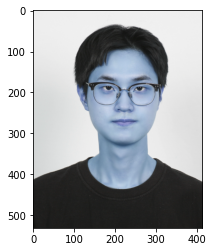

In [422]:
my_image_path = 'images/my_img.jpg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

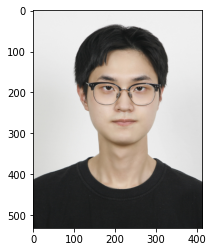

In [423]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [424]:
detector_hog = dlib.get_frontal_face_detector()

### detector_hog를 통해 얼굴의 bounding box를 추출

In [425]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(139, 139) (324, 325)]]


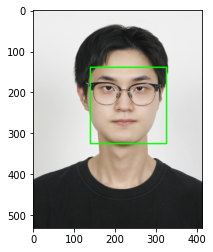

In [426]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [427]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)

In [428]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))    

68


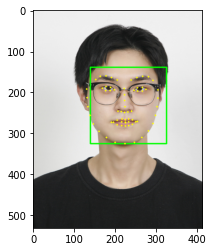

In [429]:

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [430]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(223, 235)
(x,y) : (223,235)
(w,h) : (186,186)


In [431]:

sticker_path = 'images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) 

(186, 186, 3)


코를 중앙영역으로 하기위해 h//2을 해준다.

In [432]:
refined_x = x - w // 2 
refined_y = y - (h//2)

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

(x,y) : (130,142)


In [433]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (130,142)


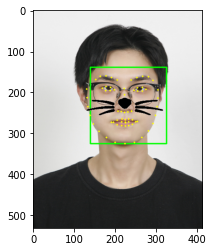

In [434]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # 채널값이 255이 부분만 출력
    
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

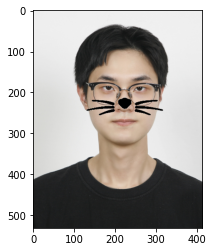

In [435]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8) # 채널값이 255이 부분만 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.show()

다양한 컬러를 가진 투명배경이미지를 만들고 싶은경우
하나의 컬러값만 출력하기 방식으로는 투명배경을 완전히 표현할 수 없기 때문에
아래와 같이 채널4인 이미지를 그대로 읽어들여 alpha값과 bgr값으로 분리하여 이미지를 설정해주어야 한다.

In [414]:
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) 

bgr = img_sticker[:, :, :3]
alpha = img_sticker[:, :, 3] / 255.0
alpha = np.dstack([alpha]*3)

result = alpha * bgr + (1 - alpha) * sticker_area

ValueError: operands could not be broadcast together with shapes (512,512,3) (224,224,3) 

## 회고

고양이 수염이미지에 배경을 제거하는 여러가지 시도를 하였으나 결국에는 깔끔하게 합성하지 못했습니다.
대신 수염이미지는 검은색과 흰색으로만 구성되어 있긴 때문에 채널값이 255인 부분만 출력하여 투명배경인 것 처럼 표현했습니다.
시각적으로 결과는 같기 때문에 여러가지 방법을 도전해야겠다는 생각이 들었습니다.